# Homework 5
This homework requires `wine.csv`, and the `tidyverse` and `Rtsne` packages. Install them if you haven't already!  
See the following link for how to add new packages to Binder: https://github.com/rjenki/BIOS512?tab=readme-ov-file#adding-packages-to-installr-later.   
**For readability and easier processing, please make each question part a different code chunk.**

In [20]:
# attaching nessecary packages
library(tidyverse)
library(dplyr)
library(Rtsne)

## Question 1 

#### a) Import your data. 

In [21]:
# reading in dataframe
df <- read.csv("~/Downloads/GitHub/BIOS-512/Data/wine.csv")


#### b) Check out the columns present using one of R's data frame summary. 

In [22]:
# seeing columns present
glimpse(df)


Rows: 178
Columns: 14
$ Alcohol                       <dbl> 14.23, 13.20, 13.16, 14.37, 13.24, 14.20…
$ Malicacid                     <dbl> 1.71, 1.78, 2.36, 1.95, 2.59, 1.76, 1.87…
$ Ash                           <dbl> 2.43, 2.14, 2.67, 2.50, 2.87, 2.45, 2.45…
$ Alcalinity_of_ash             <dbl> 15.6, 11.2, 18.6, 16.8, 21.0, 15.2, 14.6…
$ Magnesium                     <int> 127, 100, 101, 113, 118, 112, 96, 121, 9…
$ Total_phenols                 <dbl> 2.80, 2.65, 2.80, 3.85, 2.80, 3.27, 2.50…
$ Flavanoids                    <dbl> 3.06, 2.76, 3.24, 3.49, 2.69, 3.39, 2.52…
$ Nonflavanoid_phenols          <dbl> 0.28, 0.26, 0.30, 0.24, 0.39, 0.34, 0.30…
$ Proanthocyanins               <dbl> 2.29, 1.28, 2.81, 2.18, 1.82, 1.97, 1.98…
$ Color_intensity               <dbl> 5.64, 4.38, 5.68, 7.80, 4.32, 6.75, 5.25…
$ Hue                           <dbl> 1.04, 1.05, 1.03, 0.86, 1.04, 1.05, 1.02…
$ X0D280_0D315_of_diluted_wines <dbl> 3.92, 3.40, 3.17, 3.45, 2.93, 2.85, 3.58…
$ Proline         

#### c) Get summary statistics on the numeric variables.  

In [23]:
#c) 

#Getting summary statistics on numeric variables
summary(df)
# note to sefl: putting just summary with dataframe, R automatically gets summary stats for each column

    Alcohol        Malicacid          Ash        Alcalinity_of_ash
 Min.   :11.03   Min.   :0.740   Min.   :1.360   Min.   :10.60    
 1st Qu.:12.36   1st Qu.:1.603   1st Qu.:2.210   1st Qu.:17.20    
 Median :13.05   Median :1.865   Median :2.360   Median :19.50    
 Mean   :13.00   Mean   :2.336   Mean   :2.367   Mean   :19.49    
 3rd Qu.:13.68   3rd Qu.:3.083   3rd Qu.:2.558   3rd Qu.:21.50    
 Max.   :14.83   Max.   :5.800   Max.   :3.230   Max.   :30.00    
   Magnesium      Total_phenols     Flavanoids    Nonflavanoid_phenols
 Min.   : 70.00   Min.   :0.980   Min.   :0.340   Min.   :0.1300      
 1st Qu.: 88.00   1st Qu.:1.742   1st Qu.:1.205   1st Qu.:0.2700      
 Median : 98.00   Median :2.355   Median :2.135   Median :0.3400      
 Mean   : 99.74   Mean   :2.295   Mean   :2.029   Mean   :0.3619      
 3rd Qu.:107.00   3rd Qu.:2.800   3rd Qu.:2.875   3rd Qu.:0.4375      
 Max.   :162.00   Max.   :3.880   Max.   :5.080   Max.   :0.6600      
 Proanthocyanins Color_intensity  

## Question 2

#### a) Scale and center your data  
*Hint:* Use a `mutate()` statement across all columns **except class** with `function(x) as.numeric(scale(x))`.

In [24]:

df <- df %>% mutate(across(c(Alcohol,Malicacid, Ash, Alcalinity_of_ash, Magnesium, Total_phenols, Flavanoids, Nonflavanoid_phenols, Proanthocyanins, Color_intensity, Hue, X0D280_0D315_of_diluted_wines, Proline), 
                           function(x) as.numeric(scale(x))))

#### b) Based on what you saw in the summary statistic table from the imported data, why would scaling and centering this data be helpful before we perform PCA?

## Question 3

#### a) Perform PCA

In [25]:
#performing PCA
df_pca <- prcomp(df)

#### b) How much of the total variance is explained by PC1? PC2? What function do we use to see that information?

In [26]:
summary(df_pca)

# by PC1, 0.9981 of the variance is explained and by PC2 0.00174 of the varience is explained

Importance of components:
                          PC1    PC2    PC3     PC4     PC5     PC6     PC7
Standard deviation     2.2798 1.5802 1.2025 0.96088 0.93177 0.81319 0.74358
Proportion of Variance 0.3821 0.1836 0.1063 0.06789 0.06383 0.04862 0.04065
Cumulative Proportion  0.3821 0.5657 0.6721 0.73995 0.80378 0.85241 0.89306
                           PC8     PC9    PC10   PC11    PC12    PC13   PC14
Standard deviation     0.59107 0.54018 0.50784 0.4752 0.41083 0.34248 0.2086
Proportion of Variance 0.02569 0.02145 0.01896 0.0166 0.01241 0.00862 0.0032
Cumulative Proportion  0.91875 0.94020 0.95916 0.9758 0.98818 0.99680 1.0000

#### c) Why are we doing PCA first?

  *A:* We are doing PCA first because we want to capture the columns that have the most variance in the data set to do further analysis on. Doing so we are conducting analysis on the columns with most variations to capture those that are affecting the data the most. It also helps in reducing the amount of data that is only building more noise and takes out low-variance data to focus on high-variance data.  

#### d) What is the rotation matrix? Print it explicitly.  
*Hint:* Check the notes for a simple way to do this!

In [27]:
# The rottion matrix is a matrix such that it takes the data and rotates it preseving the original shape of the data. This provides a new perspective to look at data and find observations that can be seen through this.

df_rm <- df_pca$rotation
# no need to do solve it, the rotation matrix is automatially given by this
df_rm

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
Alcohol,-0.139554110,-0.483986584,-0.2073937774,-0.05202454,0.26128775,0.16536102,0.08109663,0.41085968,-0.48056233,0.26657031,-0.22307817,-0.265240813,0.02620159,-0.082231639
Malicacid,0.231278771,-0.224052306,0.0888801156,0.50792619,0.09224016,0.58008658,-0.38986636,0.07811783,0.03061612,-0.32214644,0.07118746,0.120491970,-0.04853550,0.025647729
Ash,-0.000758731,-0.315929724,0.6261495205,-0.23483910,0.12056093,0.12592437,0.16145692,-0.17151142,0.28629906,-0.08144576,-0.49601658,-0.047383556,0.17320790,-0.014819695
Alcalinity_of_ash,0.230293094,0.011263089,0.6120248225,0.06750549,-0.05695664,-0.09534441,0.27494282,0.42011625,-0.15910053,0.11386621,0.47628860,-0.058460009,-0.15775842,0.099229101
Magnesium,-0.131041028,-0.300236426,0.1308963493,-0.25528136,-0.75961835,0.10479264,-0.32783323,-0.15219546,-0.26275246,0.10095846,0.07123668,0.061706989,-0.05861093,-0.013969977
Total_phenols,-0.372792367,-0.066404359,0.1463803150,0.19504272,0.14215523,-0.12544691,0.03482640,-0.38223991,-0.35387300,-0.32340394,0.29983404,-0.302432020,0.41707864,0.169545891
Flavanoids,-0.403237284,0.002017377,0.1508538950,0.14885364,0.10784345,-0.04674972,0.06557152,-0.18072307,-0.07250367,-0.15083796,-0.02996008,-0.046369111,-0.71106740,-0.452804254
Nonflavanoid_phenols,0.278847444,-0.027604752,0.1701277248,-0.27078415,0.47058669,-0.25340042,-0.60671679,-0.23206171,-0.17571862,0.23033372,0.12026342,0.042506815,-0.08908413,-0.058790535
Proanthocyanins,-0.291925075,-0.040561908,0.1497147503,0.43527140,-0.12361143,-0.49254225,-0.40687583,0.35471193,0.24105395,0.12403042,-0.23448023,-0.094480759,0.11423370,0.039562012
Color_intensity,0.089426322,-0.529856997,-0.1372817801,0.06919472,0.05497895,-0.42598886,0.19989161,-0.03762399,-0.06894372,-0.24930845,0.02389587,0.601198625,-0.08479641,0.160155281


#### e) Plot PC1 vs. PC2, using the wine class as labels for coloring.  
*Hint:* You'll first need a data set with only PC1 and PC2, then add back the class variable from your scaled data set with a `mutate()` statement. Then, you can use `color = factor(class)` in your `ggplot` statement.

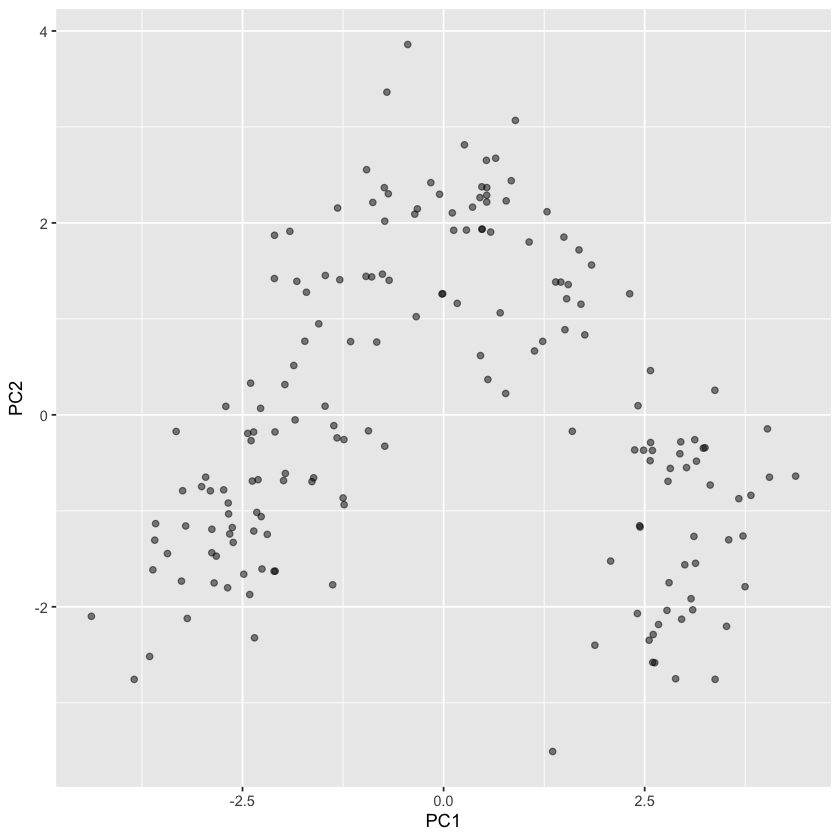

In [28]:
# selecting pc1 and pc2 dataset to make a new dataframe such that PC1 and PC2 are only included

all_pcs <- as.data.frame(df_pca$x)
all_pcs <- all_pcs %>% mutate(class = df$class)
pc1_pc2 <- all_pcs %>% select(PC1, PC2, class)

# graphing the data
pc1_pc2 %>% ggplot(aes(x=PC1, y=PC2), color = factor(class)) + 
  geom_point(alpha=0.5)

#### f) What do you see after plotting PC1 vs. PC2? What does this mean in context of wine classes?

*A:* After plotting PC1 vs PC2 I see that for the three classes, there are already three clusters formed. These three clusters identify the three classes of wine that are plotted below. It essentially shows the key differences between the classes of wine and how different they are in their characteristics.

#### g) Give an example of data where PCA would fail. You can describe the data or do a simulation.  
*Hint:* Our notes have a few examples!

*A:* An example where PCA would fial is when our data set is in the shape of a circle or is in a non-linear shape. PCA depends on the assumtipns that he data is close to a linear form, and thus when it is not, PCA does nto give us accurate dimensionality reductions on the data

#### h) Explain the difference between vector space and manifold, and how these terms apply to what we did/will do with T-SNE.

*A:* A vector space is a space such that vectors are abe to reside in contingent upon certain axions ("rules") which are flat such that in there vectors are able to be added, subtracted, multipled without leaving the vector space. These spaces are defined globally because a vector space shows all vectors possible that could reside here.  While, a manifold is something that resembles a vector space, but locally.  Specifically, a manifold shows the difference between points and is usually a curved space as compared to a vector space, which is flat.

## Question 4
#### a) Perform T-SNE
Set `seed = 123`.  
*Hint:* Subset your PCA results to PC1–PC10, add the class variable back in, remove duplicates, then perform T-SNE.

In [29]:
pca1_10 <- all_pcs %>% select(PC1:PC10) %>% distinct() %>% as.matrix()

set.seed(123)
tsne_pc110 <- Rtsne(pca1_10, dims=2, perplexity = 30, check_duplicates = FALSE)
tsne_pc110

-10.991017,-4.765462
-7.735253,-3.899580
-8.371158,-8.419191
-10.857401,-7.000014
-4.785582,-7.281540
-10.062790,-7.503384
-8.580318,-5.699759
-6.288966,-6.926571
-9.124226,-5.523813
-9.705807,-5.693304
-9.185016,-7.480712


#### b) Plot the results in 2D
*Hint:* Convert your T-SNE results to a tibble and add back the class variable from your scaled data set using a `mutate()` statement. Then, you can use `color = factor(class)` in your `ggplot` statement.

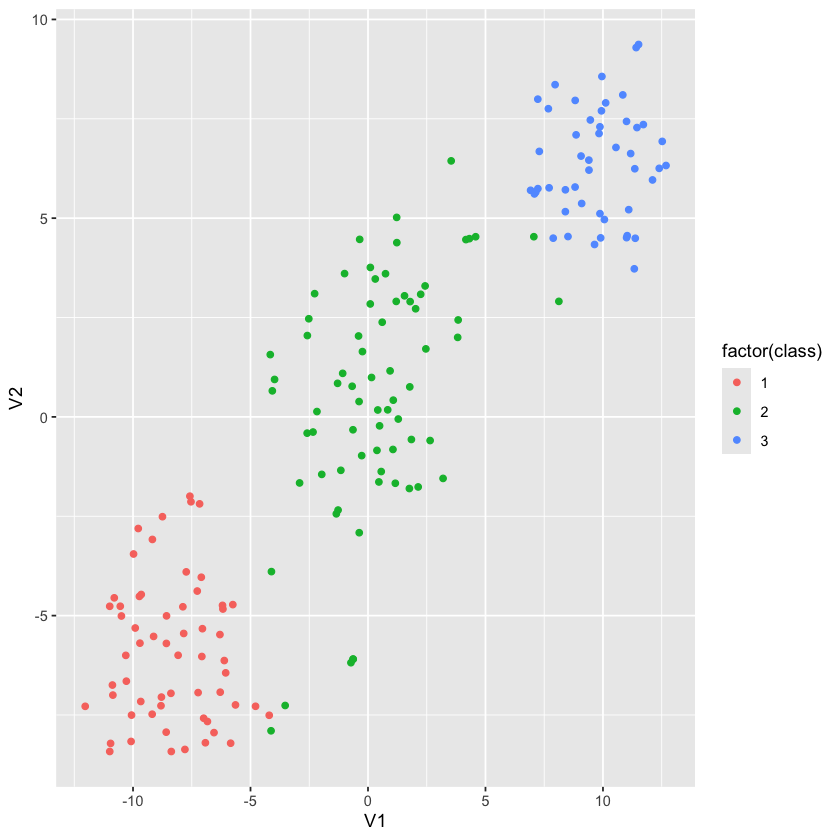

In [31]:
results <- as_tibble(tsne_pc110$Y) %>% mutate(class = df$class)

ggplot(results, aes(x=V1, y=V2, color=factor(class))) + 
  geom_point()

#### c) Why didn't we stop at PCA?

*A:* We didn't stop at PCA because the actual clustering of the data from the PCA is hard to see. Thus, performing T-SNE helps accurately visualize the distances between the points and how much they differ from each other.  PCA visualizes these points but also when plotted it retains the overall shape of the original distribution which is helpful, but can be hard when we want to see key differences between these points.  Thus, doing T-SNE we can accurately see the differences between the points which are more pronounced here. 


#### d) What other types of data does this workflow make sense for?

*A:* This workflow also makes sense for when we have high dimensional datasets and we run PCA however we want to understand better how the data looks visually.  We run T-SNE so we can understand how the data looks on a local scale visually meaning how the data looks in the context of the data given when in reduced dimensions. This workflow also makes sense for data that is not linear naturally as T-SNE helps make relationships between data points even if the data is not linear.